In [1]:
from esda.moran import Moran
import geopandas as gpd
from libpysal.weights import DistanceBand, KNN
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import sys

from statshelper import q_q_plot

In [2]:
df = pd.read_csv("./data/processed/Cleaned_Chicago_Sales.csv")
df.head()

,Unnamed: 0,PIN,Property Class,Neighborhood Code,Land Square Feet,Town Code,Type of Residence,Apartments,Wall Material,Roof Material,...,Bool-Type of Residence-1,Bool-Type of Residence-2,Bool-Type of Residence-4,Bool-Type of Residence-8,Bool-Type of Residence-7,Bool-Type of Residence-6,Bool-Wall Material-2,Bool-Wall Material-3,Bool-Wall Material-1,Bool-Wall Material-4
0,2,16094150130000,211,13,-0.297580,77,3.0,6.0,2.0,2.0,...,0,0,0,0,0,0,1,0,0,0
1,5,4252000820000,204,100,2.868180,25,5.0,0.0,2.0,4.0,...,0,0,0,0,0,0,1,0,0,0
2,8,14322110150000,208,12,-0.596010,74,3.0,0.0,2.0,6.0,...,0,0,0,0,0,0,1,0,0,0
3,9,27021200080000,204,34,1.698873,28,1.0,0.0,3.0,1.0,...,1,0,0,0,0,0,0,1,0,0
4,11,13121080620000,204,42,0.515768,71,1.0,0.0,2.0,1.0,...,1,0,0,0,0,0,1,0,0,0


In [3]:
i_vars = [
    'Age',
    'Bedrooms',  
    'Building Square Feet', 
    'Estimate (Building)', 
    'Estimate (Land)', 
    'Fireplaces', 
    'Full Baths',
    'Garage 1 Area',
    'Garage 2 Area', 
    'Half Baths', 
    'Land Square Feet',
    'Rooms',
    'Sale Quarter'
    ]
dep_var = ['Sale Price']
X = df[i_vars]
y = df[dep_var]

In [4]:
X_cons = sm.add_constant(X)
ols = sm.OLS(y, X_cons, name_y=dep_var, name_x=i_vars).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale Price   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                 4.810e+04
Date:                Fri, 30 Apr 2021   Prob (F-statistic):               0.00
Time:                        10:13:53   Log-Likelihood:            -2.8590e+05
No. Observations:              324261   AIC:                         5.718e+05
Df Residuals:                  324247   BIC:                         5.720e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.1191      0.010   -109.405      0.000      -1.139      -1.099
Age                     -0.1372      0.001   -106.915      0.000      -0.140      -0.135
Bedrooms                -0.0117      0.002     -5.520      0.000      -0.016      -0.008
Building Square Feet     0.0187      0.002      7.764      0.000       0.014       0.023
Estimate (Building)      0.5069      0.002    309.875      0.000       0.504       0.510
Estimate (Land)          0.3454      0.002    221.420      0.000       0.342       0.348
Fireplaces               0.0119      0.001      9.387      0.000       0.009       0.014
Full Baths              -0.0036      0.002     -1.996      0.046      -0.007   -6.63e-05
Garage 1 Area            0.0377      0.001     34.995      0.000       0.036       0.040
Garage 2 Area            0.0004      0.001      0.397      0.691      -0.002       0.002
Half Baths               0.0279      0.001     23.482      0.000       0.026       0.030
Land Square Feet        -0.0669      0.001    -51.563      0.000      -0.069      -0.064
Rooms                    0.0158      0.002      6.530      0.000       0.011       0.021
Sale Quarter             0.0142      0.000    109.960      0.000       0.014       0.014
==============================================================================
Omnibus:                    49024.836   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           263338.370
Skew:                          -0.626   Prob(JB):                         0.00
Kurtosis:                       7.234   Cond. No.                         790.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

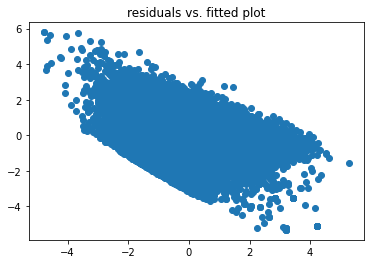

In [5]:
plt.scatter(ols.predict(), ols.resid)
plt.title("residuals vs. fitted plot")
plt.show()

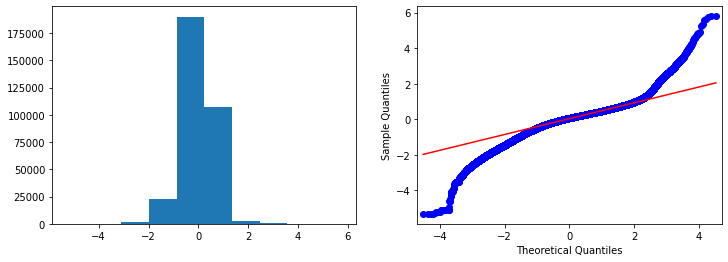

In [6]:
q_q_plot(ols.resid)

In [7]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))

<AxesSubplot:>

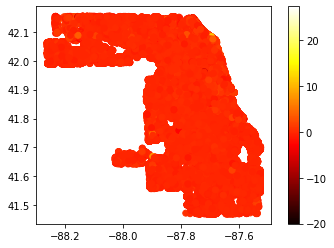

In [8]:
gdf.plot(column=ols.resid, cmap="hot", legend=True
         alpha=0.5, figsize=(12,8))

In [9]:
w = DistanceBand.from_dataframe(gdf,threshold=.0075) # needed k large enough that it was connected
w.transform = 'R'

/home/dijkstra/.local/lib/python3.8/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 88 disconnected components.
 There are 27 islands with ids: 1025, 3000, 8645, 8681, 14607, 25516, 29126, 34489, 46605, 47803, 49146, 66007, 91329, 93298, 98460, 108991, 110052, 164015, 164391, 218324, 228073, 235430, 244028, 267946, 282806, 295834, 320202.
  warnings.warn(message)


('WARNING: ', 1025, ' is an island (no neighbors)')
('WARNING: ', 3000, ' is an island (no neighbors)')
('WARNING: ', 8645, ' is an island (no neighbors)')
('WARNING: ', 8681, ' is an island (no neighbors)')
('WARNING: ', 14607, ' is an island (no neighbors)')
('WARNING: ', 25516, ' is an island (no neighbors)')
('WARNING: ', 29126, ' is an island (no neighbors)')
('WARNING: ', 34489, ' is an island (no neighbors)')
('WARNING: ', 46605, ' is an island (no neighbors)')
('WARNING: ', 47803, ' is an island (no neighbors)')
('WARNING: ', 49146, ' is an island (no neighbors)')
('WARNING: ', 66007, ' is an island (no neighbors)')
('WARNING: ', 91329, ' is an island (no neighbors)')
('WARNING: ', 93298, ' is an island (no neighbors)')
('WARNING: ', 98460, ' is an island (no neighbors)')
('WARNING: ', 108991, ' is an island (no neighbors)')
('WARNING: ', 110052, ' is an island (no neighbors)')
('WARNING: ', 164015, ' is an island (no neighbors)')
('WARNING: ', 164391, ' is an island (no neighb

In [ ]:
w.plot(gdf)

In [ ]:
ols_moran = Moran(ols.resid, w, permutations=199)
plot_moran(ols_moran, zstandard=True, figsize=(10,4))
plt.show()